# Loading Libraries

In [405]:
#Libraries for data manipulation
import pandas as pd
import numpy as np

#Libraries for data visualization
import matplotlib.pyplot as plt                   #for plotting
import seaborn as sns                             #for data visualization
import plotly.express as px                       #for plotting

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and understaning the data

# Importing the bike sharing dataset

In [406]:
bike_sharing_dataset = pd.read_csv("day.csv")
bike_sharing_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [407]:
bike_sharing_dataset.shape

(730, 16)

In [408]:
#  =========================================
#  Dataset characteristics
#  =========================================	
#  day.csv have the following fields:
#	
#	- instant: record index
#	- dteday : date
#	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
#	- yr : year (0: 2018, 1:2019)
#	- mnth : month ( 1 to 12)
#	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#	- temp : temperature in Celsius
#	- atemp: feeling temperature in Celsius
#	- hum: humidity
#	- windspeed: wind speed
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and registered


In [409]:
# Finding data types of all columns and composition of null values across all columns

bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Missing Value Check

In [410]:
bike_sharing_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Inference:** There are no missing values in the dataset.

In [411]:
# Identifying columns having unique values

bike_sharing_dataset.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**Inference:** The cut-off for declaring variable as a categorical variable is when there at the max 30 unique values. So we see that **'season'**, **'mnth'**, **'holiday'**, **'weekday'**, **'workingday'** and **'weathersit'** are potentially categorical variables. This also becomes evident once we refer to the data dictionary provided. We will analyse and finalize whether to convert the potentially categorical variables to categorical data type or keep them as integer or float.


### Duplicate record check

In [412]:
bike_sharing_dataset_dup = bike_sharing_dataset.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_sharing_dataset_dup.drop_duplicates(subset=None, inplace=True)
print(bike_sharing_dataset_dup.shape)
print(bike_sharing_dataset.shape)

(730, 16)
(730, 16)


**Inference:** The shape after running the drop duplicate command is same as the original dataset.Hence it is evident that there are no duplicate records in the dataset.

### Dropping of variables
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

* **instant :** It is only an index value.

* **dteday :** This contains date. But there are seperate columns for 'year' & 'month',hence, this is kind of redundant.

* **casual & registered :** Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. 

In [413]:
# Drop 'instant','dteday','casual','registered' columns as they have no significance in regression analysis

bike_sharing_dataset.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [414]:
# Renaming few columns for better readibility

bike_sharing_dataset.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bike_sharing_dataset.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping all values of categorical variables as per data dictionary

In [415]:
# Encoding/mapping the season column

bike_sharing_dataset.season = bike_sharing_dataset.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [416]:
# Encoding/mapping the month column

bike_sharing_dataset.month = bike_sharing_dataset.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',
                                                             8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [417]:
# Encoding/mapping the weekday column

bike_sharing_dataset.weekday = bike_sharing_dataset.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

In [418]:
# Encoding/mapping the weathersit column

bike_sharing_dataset.weathersit = bike_sharing_dataset.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',
                                                                       4:'Heavy_snowrain'})

In [419]:
# check the head of the dataset

bike_sharing_dataset.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [420]:
# Review the columns info of the dataset

bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2: Exploratory Data Analysis

EDA always to be done as part of any Machine Learning problem solving. 

## Univariate Analysis

In [421]:
# Separating out the numerical and categorical columns

num_cols=["temp","atemp","humidity","windspeed","cnt"]
cat_cols=["season","year","month","holiday","weekday","workingday","weathersit"]

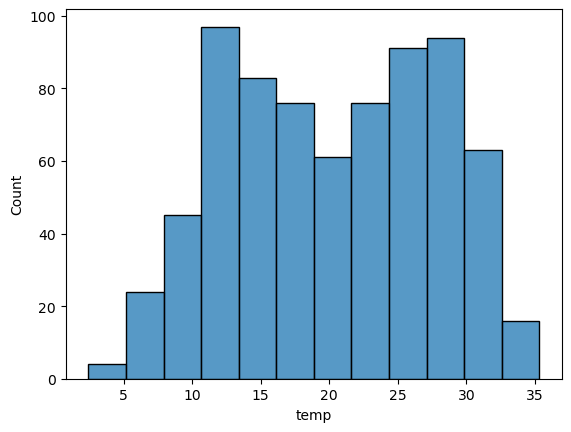

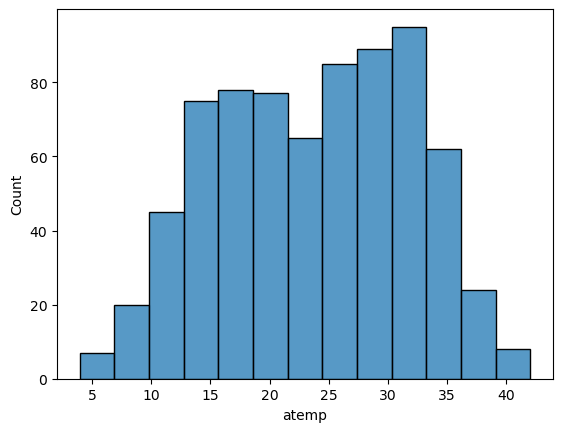

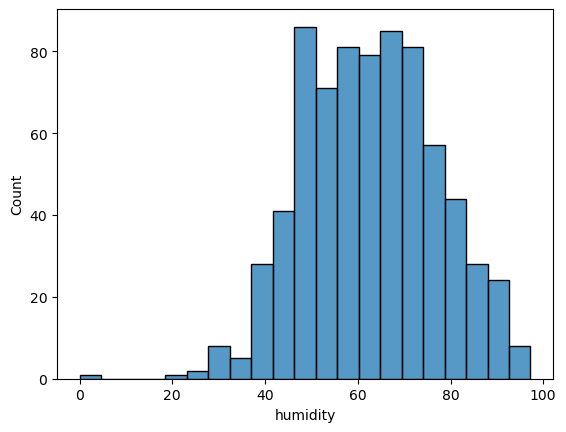

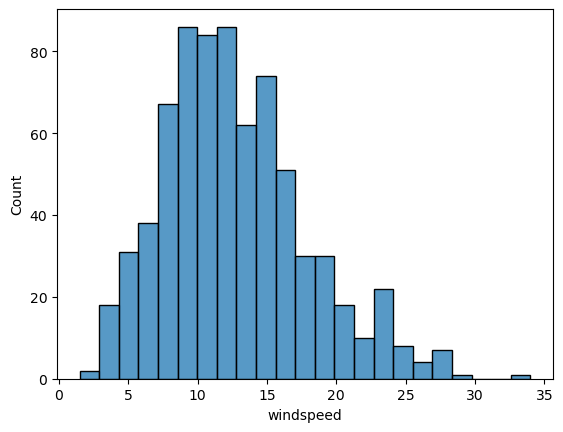

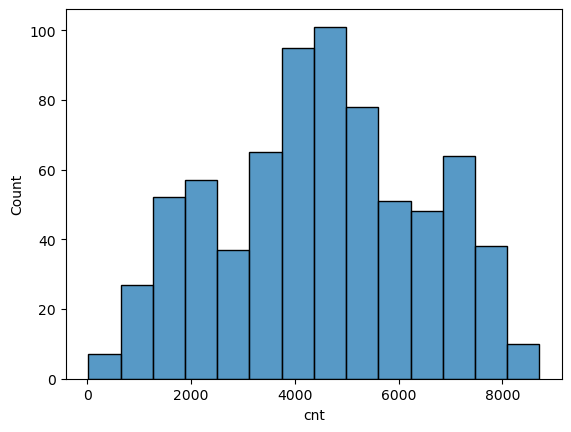

In [422]:
for i in num_cols:
    sns.histplot(x=bike_sharing_dataset[i])
    plt.show()

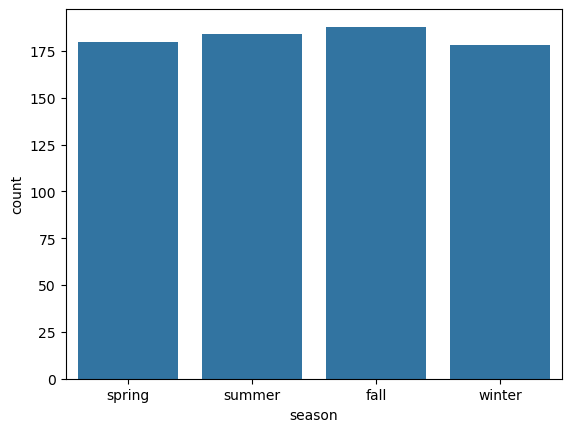

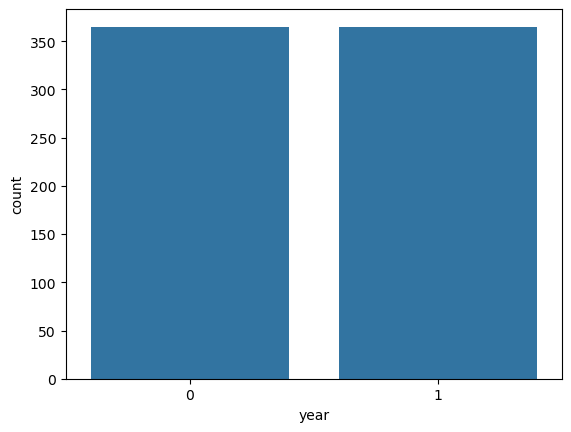

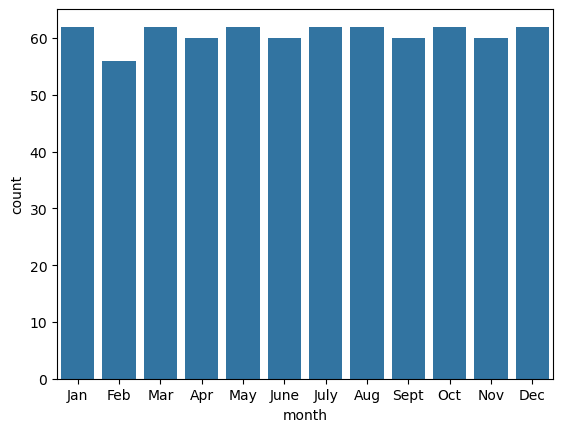

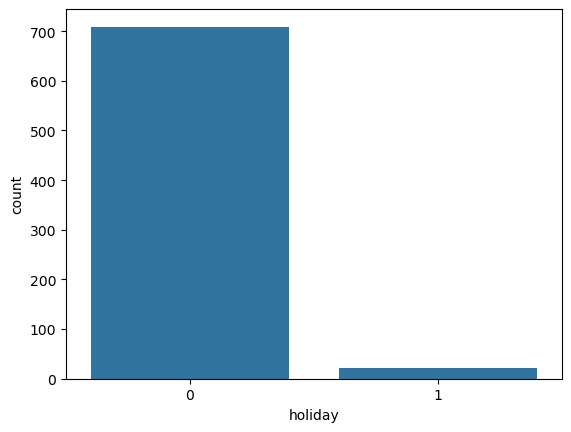

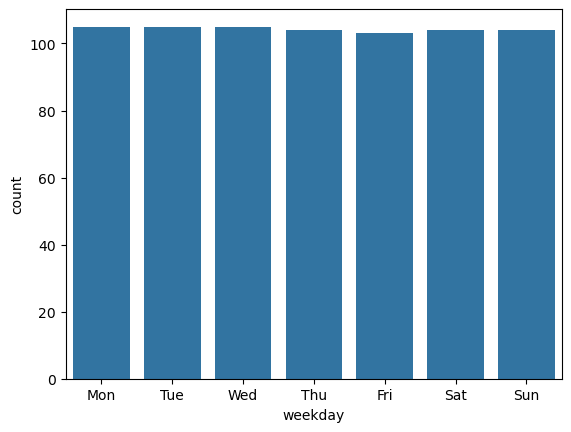

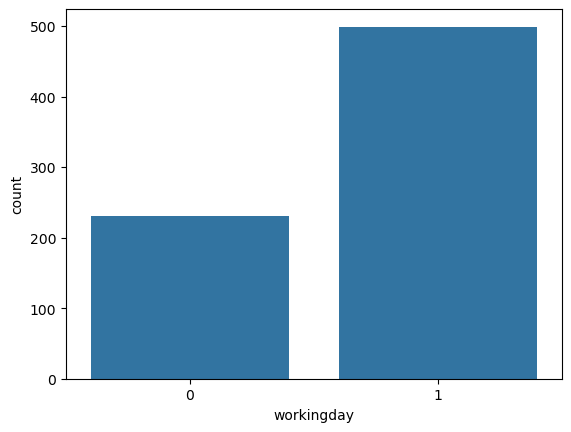

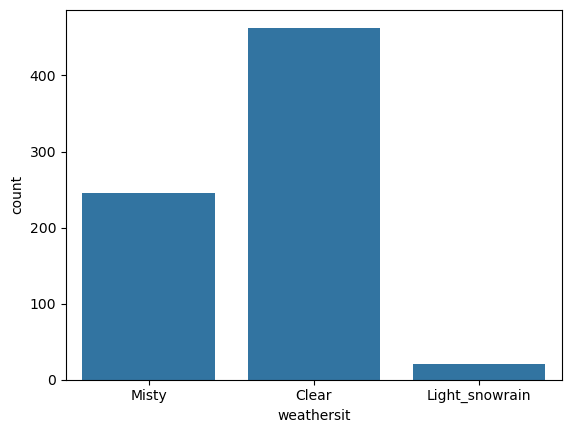

In [423]:
for i in cat_cols:
    sns.countplot(x=bike_sharing_dataset[i])
    plt.show()

**Inference:** There is nothing significant found out of univariate analysis.

## Bivariate Analysis

#### Visualising Numeric Variables

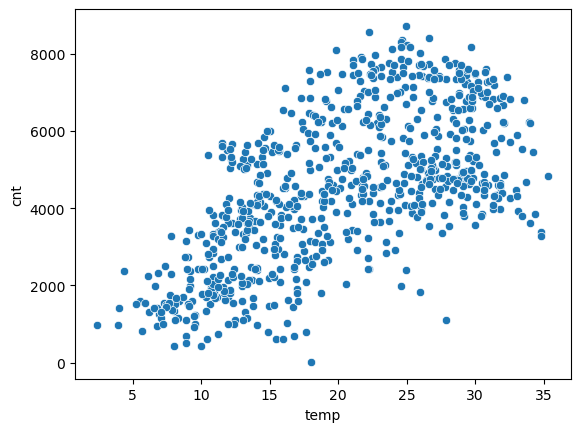

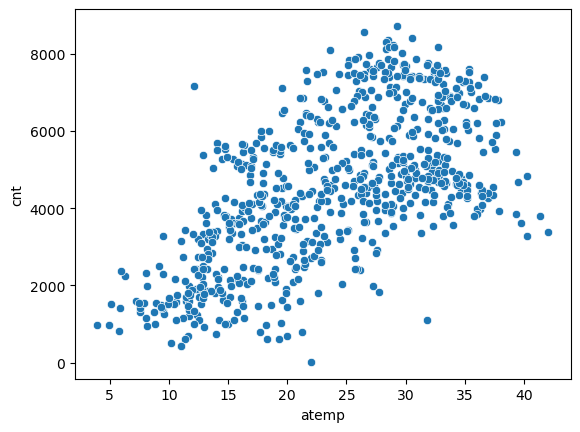

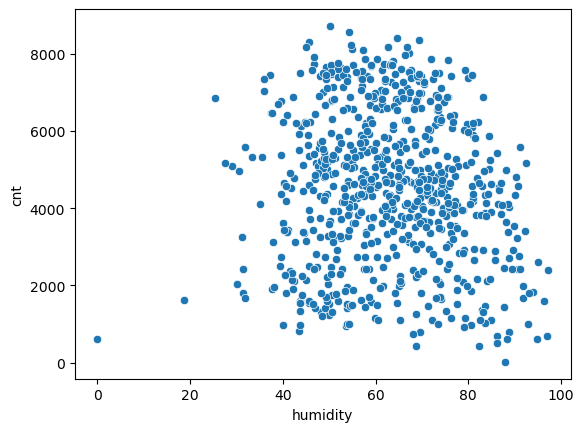

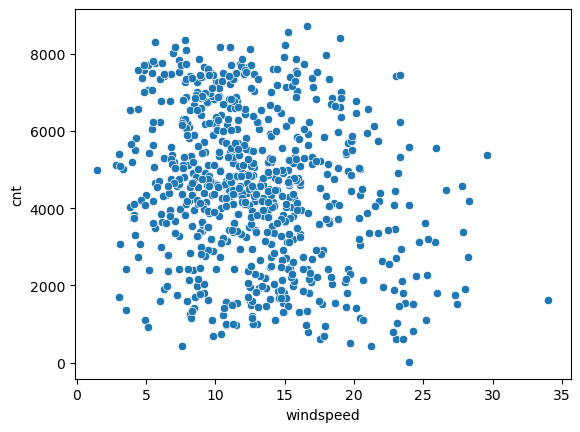

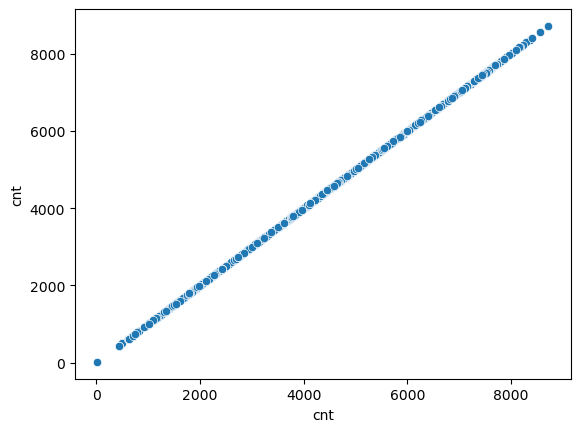

In [424]:
for i in num_cols:
    sns.scatterplot(x=bike_sharing_dataset[i],y=bike_sharing_dataset["cnt"])
    plt.show()

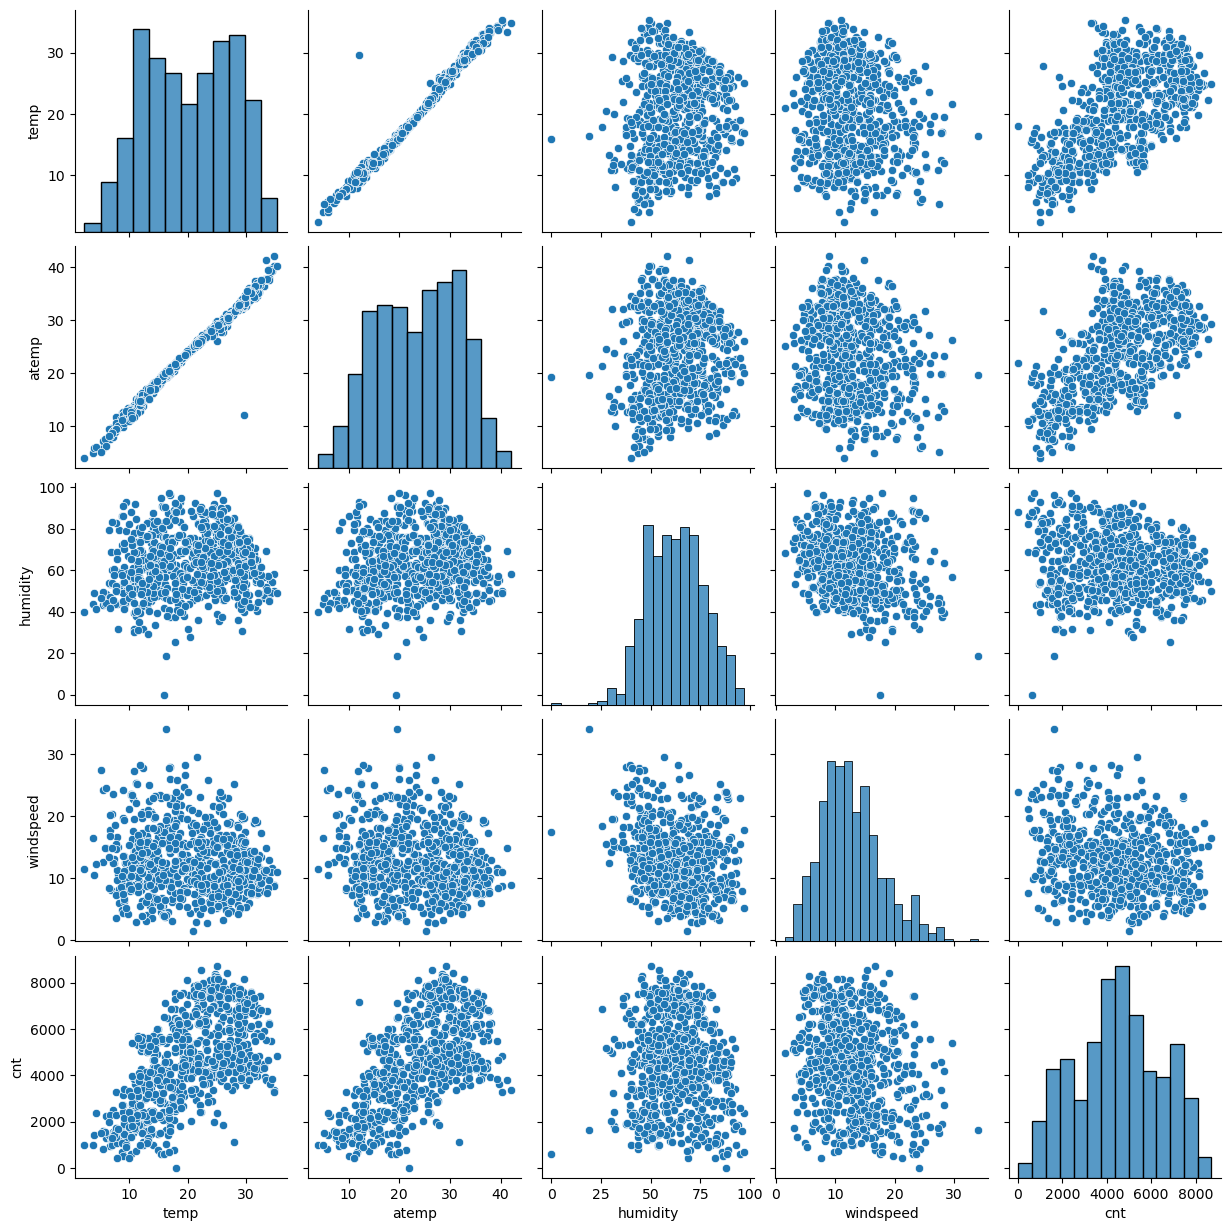

In [425]:
# Same as above but with different view

sns.pairplot(bike_sharing_dataset, diag_kind='auto', vars=num_cols)
plt.show()

**Inference :** From the above pair plot illustration, we see a linear relation between 'temp','atemp' and 'cnt'. Both the variables -'temp' and 'atemp' cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables when we step into multi-linear regression analysis in the later steps.

#### Visualising Categorical Variables

In [426]:
# More detailed display of statistics

for i in cat_cols:
    fig = px.box (bike_sharing_dataset, x=bike_sharing_dataset[i],y=bike_sharing_dataset["cnt"])
    fig.show()

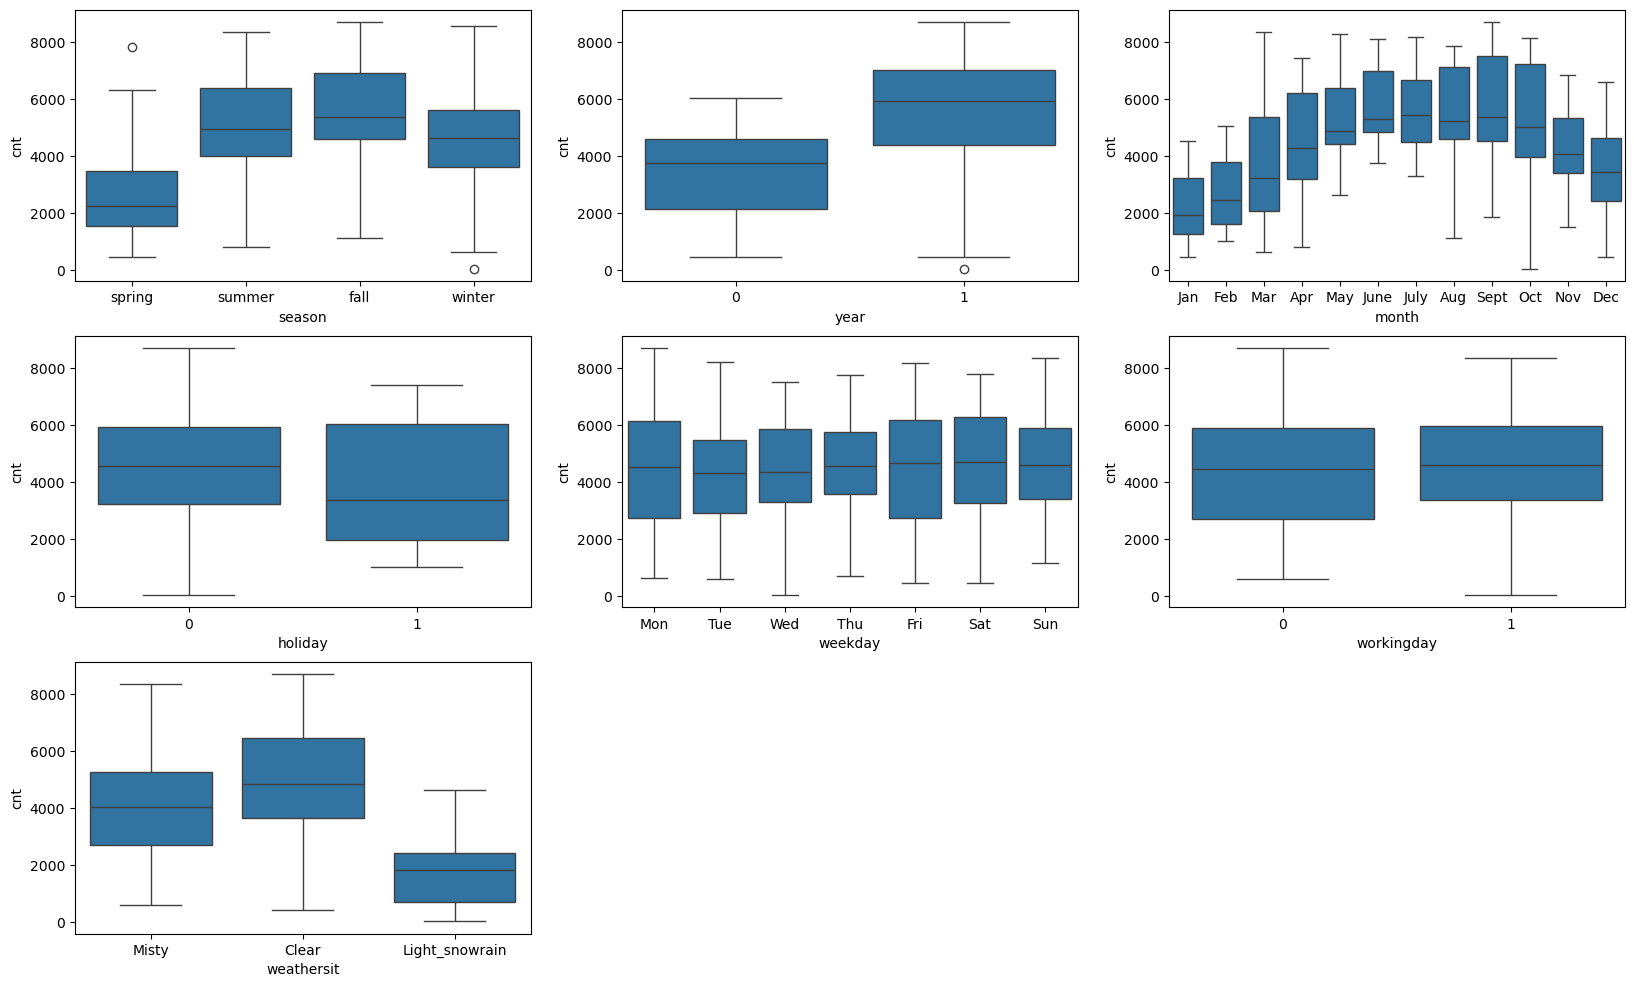

In [427]:
# Same as above but with a different(consolidated) view
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike_sharing_dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing_dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_dataset)
plt.show()



#### Inferences: 
Based upon box plots drawn on the seven categorical variables against the target variable 'cnt' in the dataset.

* **season:** Fall season seems to have attracted more booking (with a median of over 5000 booking) followed by summer and winter. This indicates, season can be a good predictor for the dependent variable.
<br>

* **year:** 2019 attracted fairly more number of bookings as compared to the previous year 2018 (median roughly shot from 4000 to 6000), which shows good progress in terms of business.

<br>

* **month:** Most of the bookings were during the month of May, June, July, August, September and October (across 2018 and 2019) with a median of 5000 or above booking per month. This indicates, month has some trend for bookings and can be a good predictor for the dependent variable. 

<br>

* **holiday:** Most of the bookings were done during holidays. This was observed across 2018 and 2019.

<br>

* **weekday:** Weekday does not give a clear picture about demand. Weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. We will decide its influence on the booking demand based upon our model evaluation. Otherwise, the spread of booking is more during Monday, Friday and Sunday.

<br>

* **workingday:** The demand for bike rental seems to be almost invariable whether it is a working day or not. The median booking is almost 4500 in both working and non-working days. This indicates, workingday cannot be a good predictor for the dependent variable.

<br>

* **weathersit:** Clear weather attracted more booking which seems obvious followed by misty weather. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

In [432]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Correlation coefficients

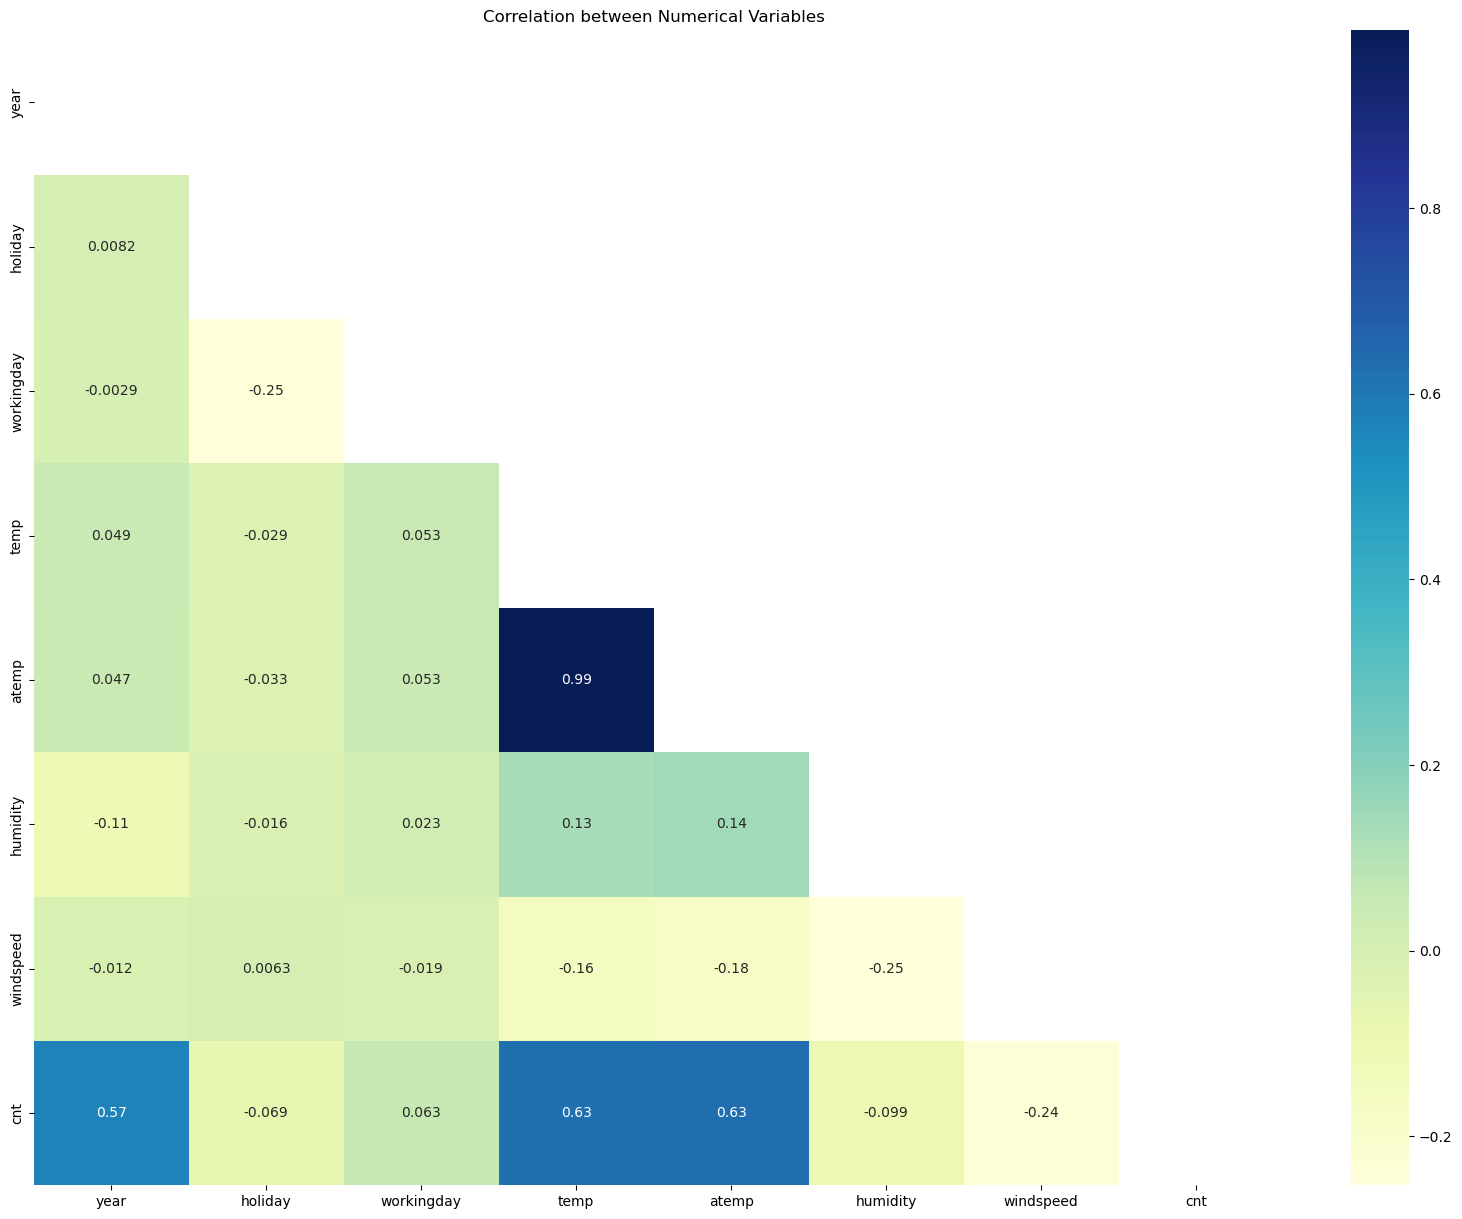

In [433]:
# Check the correlation coefficients between the numerical variables to see which variables are highly correlated. This is 
# done before creation of dummy variables and before splitting of dataset into train and test.

plt.figure(figsize = (20,15))
matrix = np.triu(bike_sharing_dataset[['year','holiday','workingday','temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike_sharing_dataset[['year','holiday','workingday','temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

**Inference:** 'temp' and 'atemp' are highly correlated. Also, 'temp', 'atemp' and 'year' are positively correlated to 'cnt'. We will review this further at the time of model building.

# Step 3: Data Preparation

In order to fit a regression line, we would need numerical values and not string. But all categorical variables are numeric in the given dataset. So there is no need to convert anyone of them to numeric.

## Pre-processing Steps

## Dummy Variable Creation

In [434]:
# Find number of unqiue values across all columns of the dataset

bike_sharing_dataset[cat_cols].nunique()# Only for non binary categorical columns

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [435]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


There are 4 categorical variables with non-binary values, viz., **'season'**, **'month'**, **'weekday'** and **'weathersit'**. So we will have to create dummy variables out of these. Before creating dummy variables we have to convert them into 'category' data types.

In [436]:
# Converting data types of categorical variables

bike_sharing_dataset['season']=bike_sharing_dataset['season'].astype('category')
bike_sharing_dataset['weathersit']=bike_sharing_dataset['weathersit'].astype('category')
bike_sharing_dataset['month']=bike_sharing_dataset['month'].astype('category')
bike_sharing_dataset['weekday']=bike_sharing_dataset['weekday'].astype('category')

In [437]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [438]:
# Dummy variable creation for month, weekday, weathersit and season variables and s
# Create the dummy variables for the features 'month',''weekday,'weather','season' and store them in new variables - 
# 'dum_month,'dum_weekday','dum_weathersit','dum_season' respectively

dum_month=pd.get_dummies(bike_sharing_dataset.month,drop_first=True,dtype=int)
dum_weekday=pd.get_dummies(bike_sharing_dataset.weekday,drop_first=True,dtype=int)
dum_weathersit=pd.get_dummies(bike_sharing_dataset.weathersit,drop_first=True,dtype=int)
dum_season=pd.get_dummies(bike_sharing_dataset.season,drop_first=True,dtype=int)

In [439]:
# Add the dummy variables columns to the original bike_sharing_dataset

bike_sharing_dataset = pd.concat([bike_sharing_dataset,dum_month,dum_weekday,dum_weathersit,dum_season],axis=1)

In [440]:
bike_sharing_dataset.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [441]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   year            730 non-null    int64   
 2   month           730 non-null    category
 3   holiday         730 non-null    int64   
 4   weekday         730 non-null    category
 5   workingday      730 non-null    int64   
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   humidity        730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  Aug             730 non-null    int32   
 13  Dec             730 non-null    int32   
 14  Feb             730 non-null    int32   
 15  Jan             730 non-null    int32   
 16  July            730 non-null    int32   
 17  June            

In [442]:
# dropping unnecessary columns as we have already created dummy variable out of those columns.

bike_sharing_dataset.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike_sharing_dataset.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [443]:
# check the shape of dataset

bike_sharing_dataset.shape

(730, 30)

In [444]:
# check the column info of dataset 

bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    int32  
 9   Dec             730 non-null    int32  
 10  Feb             730 non-null    int32  
 11  Jan             730 non-null    int32  
 12  July            730 non-null    int32  
 13  June            730 non-null    int32  
 14  Mar             730 non-null    int32  
 15  May             730 non-null    int32  
 16  Nov             730 non-null    int32  
 17  Oct             730 non-null    int

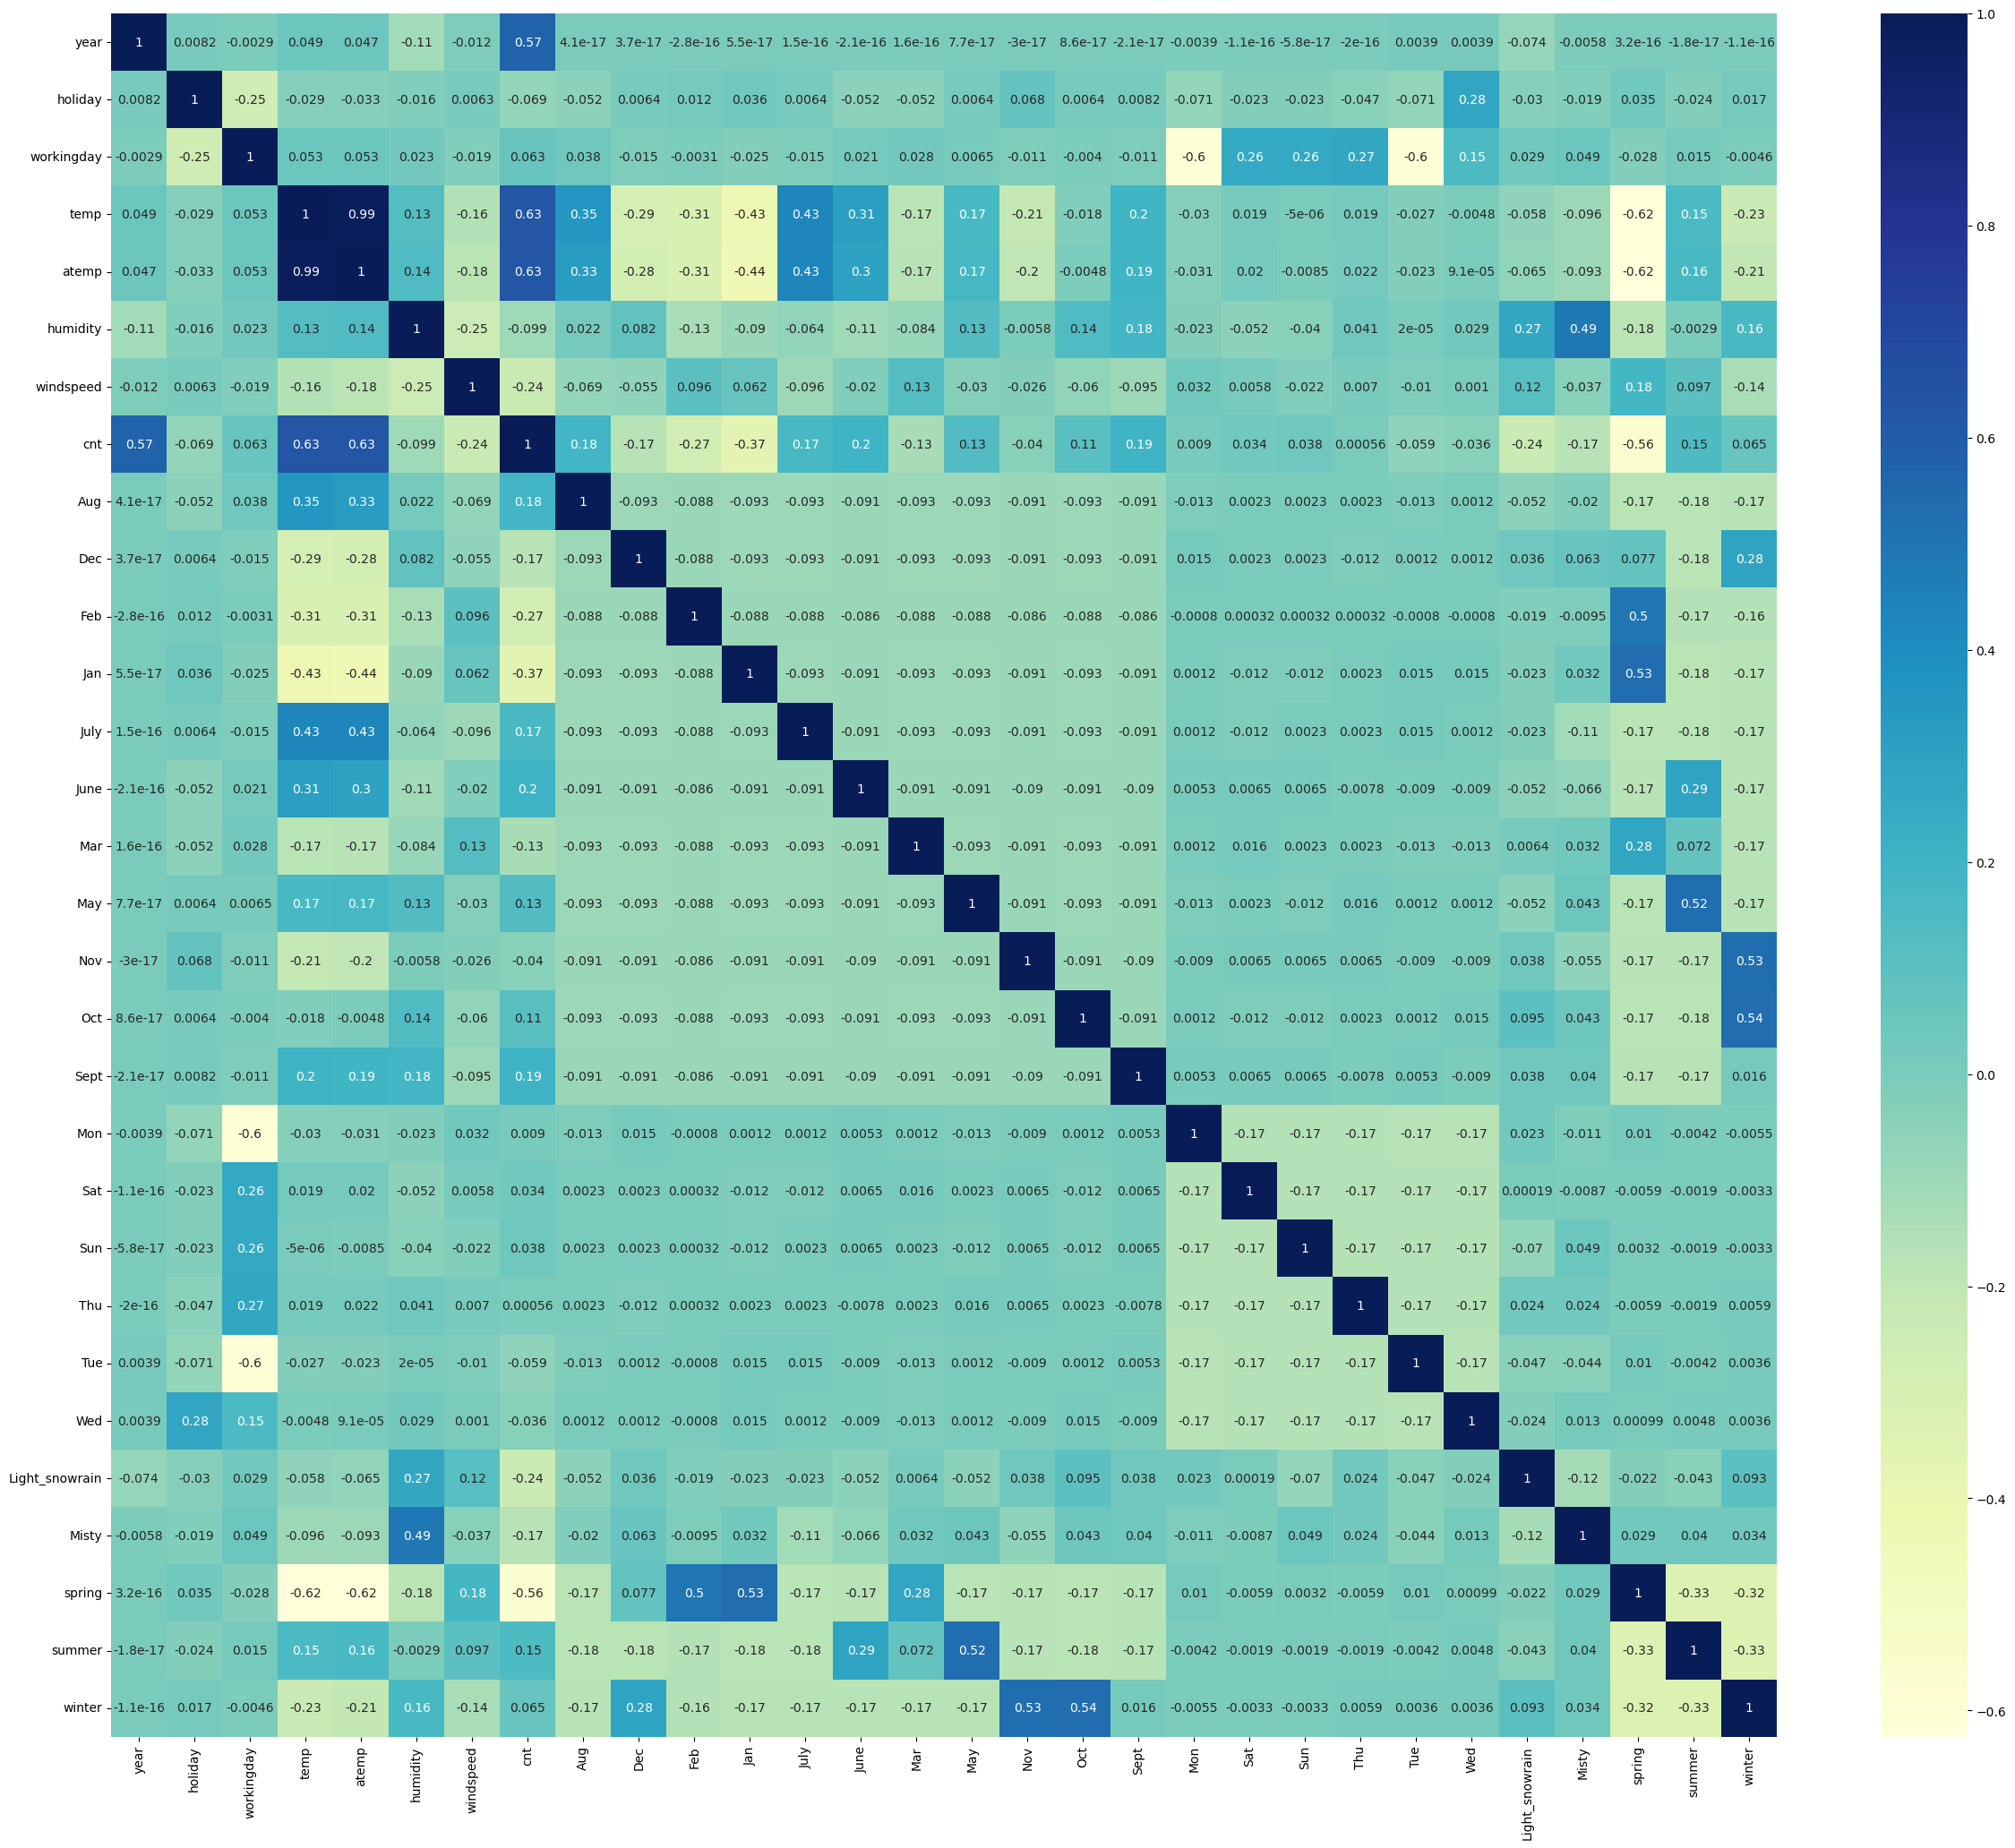

In [445]:
# Check the correlation coefficients to see which variables are highly correlated. This is done after creation of dummy
# variables and before splitting of dataset into train and test.

plt.figure(figsize = (30, 25))
sns.heatmap(bike_sharing_dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Inference:
The heatmap shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Step 4: Splitting the Data into Training and Testing Sets

In [509]:
# Splitting the data set into Train and Test in the ratio 70:30

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [510]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [511]:
# check the shape of test datatset

df_test.shape

(219, 30)

In [449]:
from sklearn.preprocessing import MinMaxScaler

In [450]:
scaler = MinMaxScaler()

In [451]:
# Checking the values before scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,0,1,0,1,0


In [452]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [455]:
# # Checking values after scaling

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,1,0,1,0


In [454]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


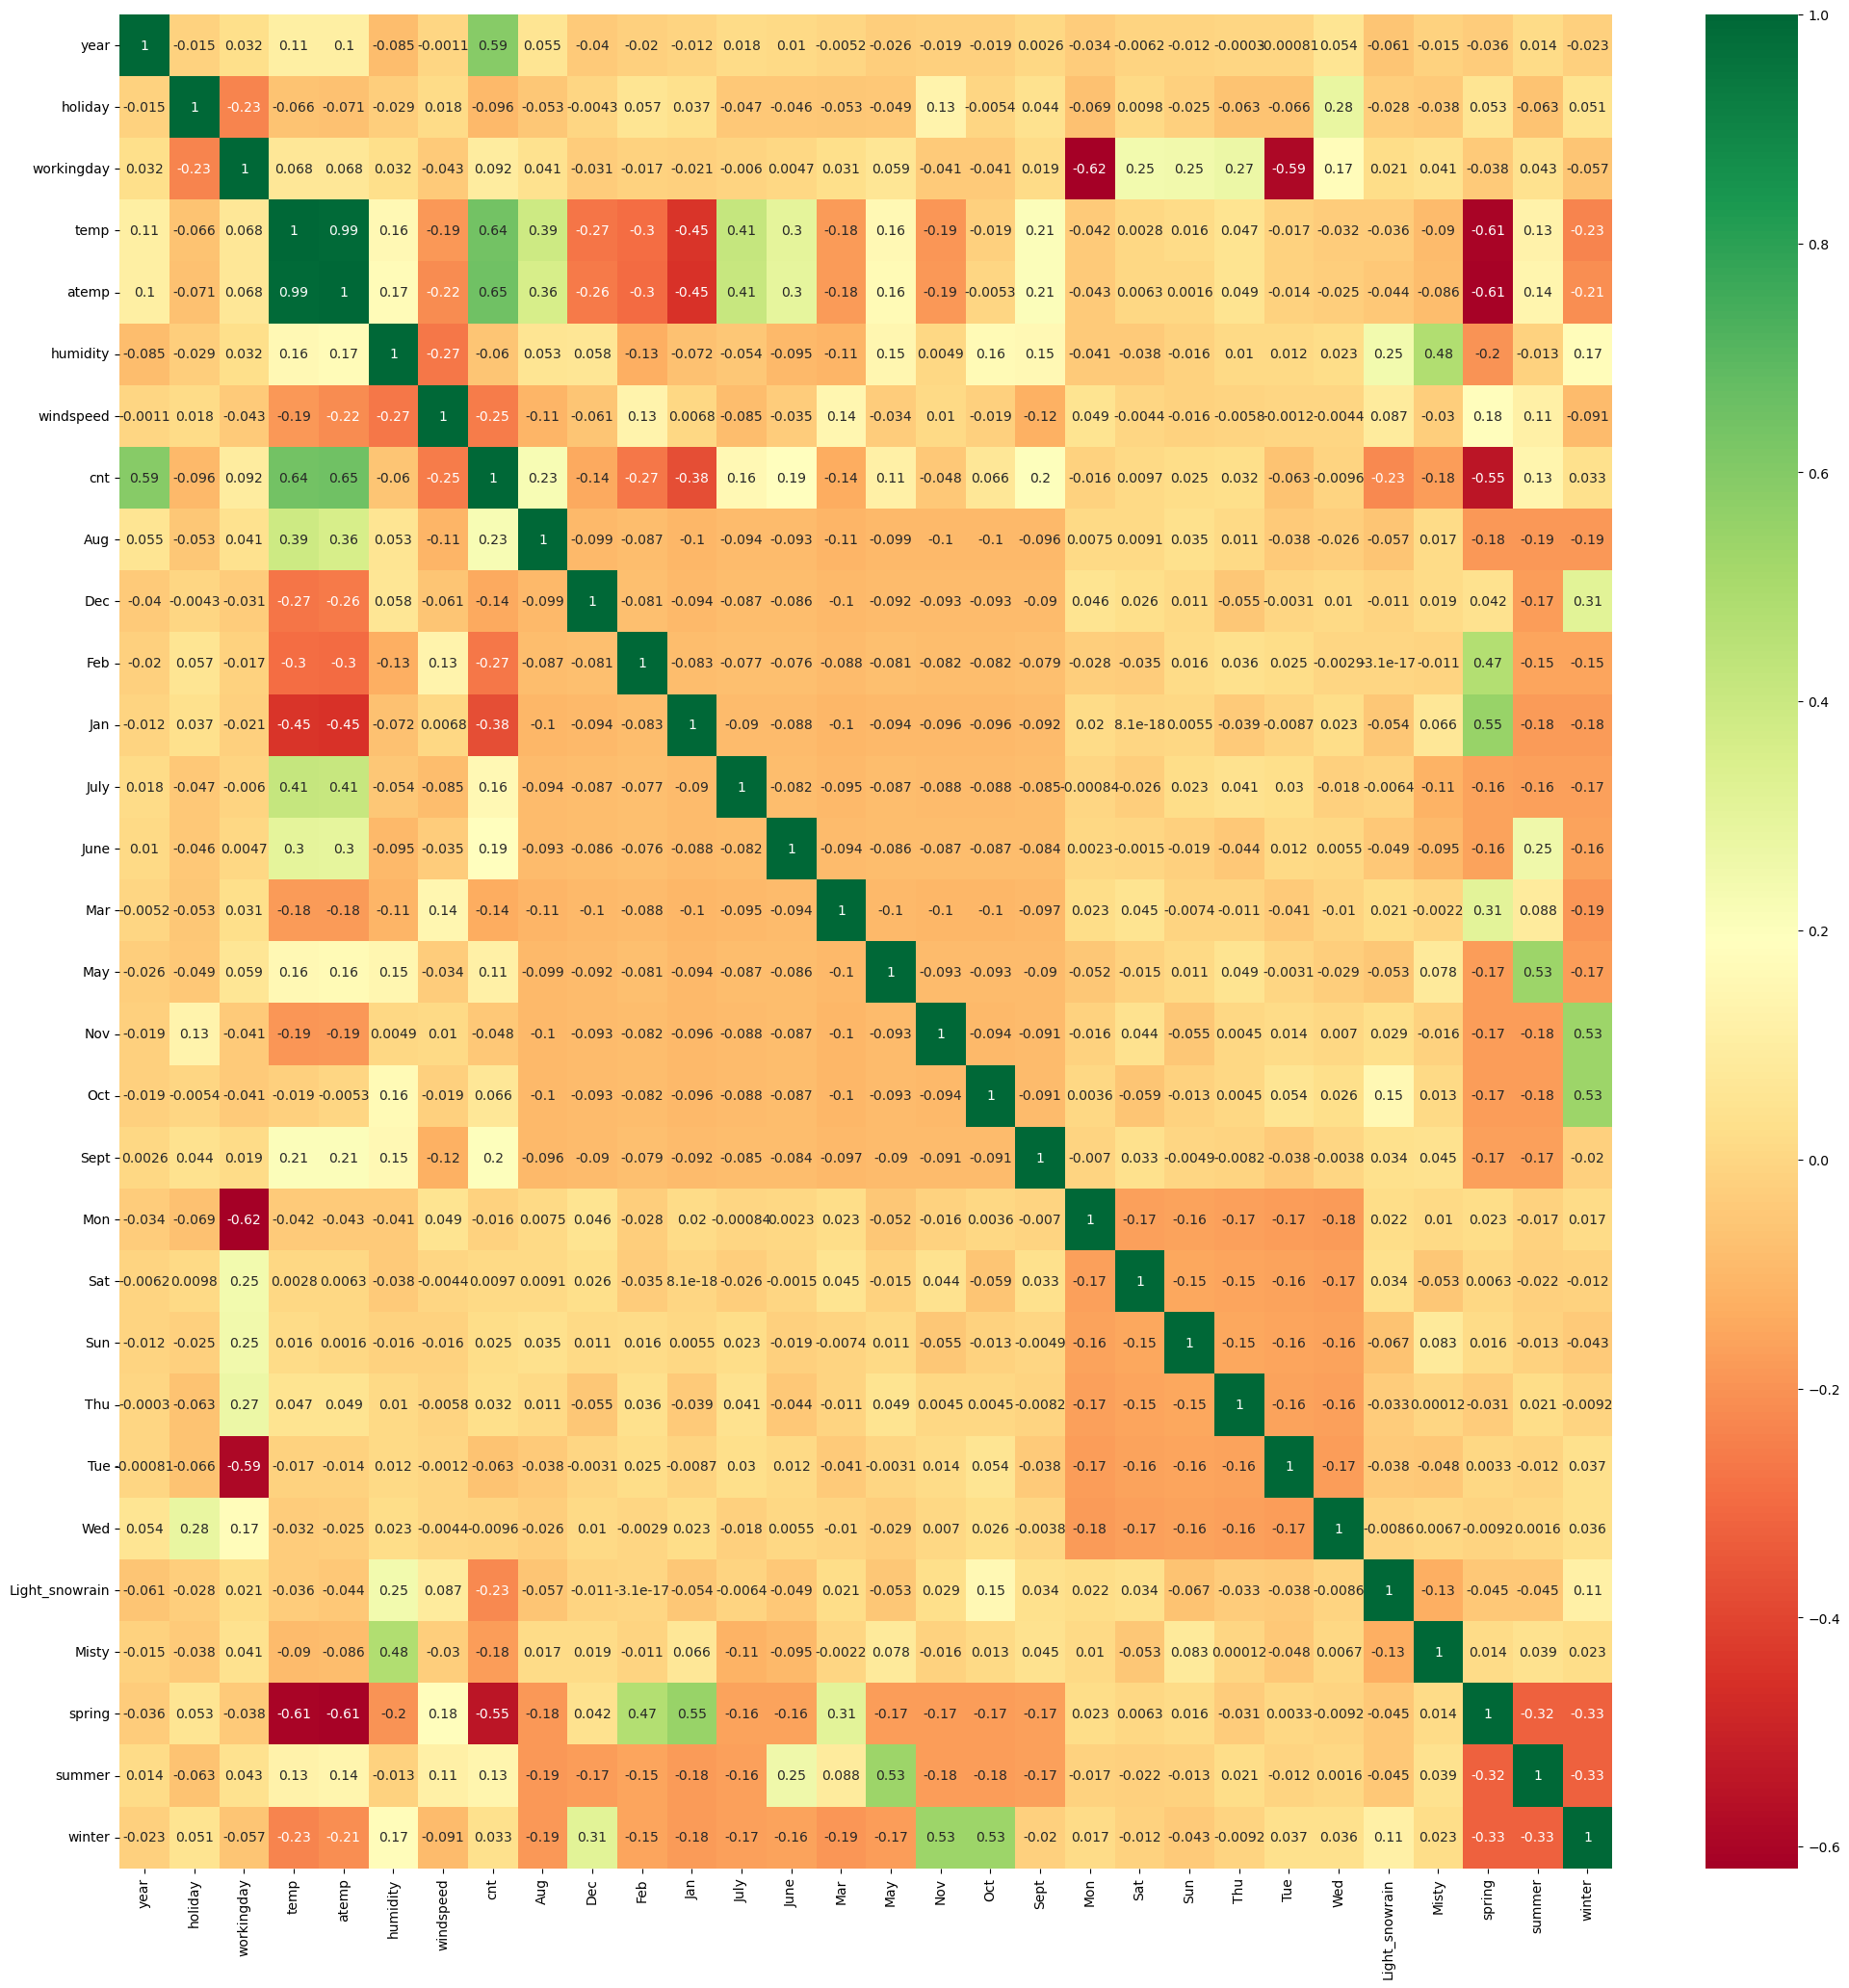

In [456]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
# matrix = np.triu(df_train.corr())
# sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Inference: 
* 'cnt' seems to have correlation with 'year' variable and 'temp'. 
* 'Misty' and 'humidity' show correlation. 
* 'Spring' season shows correlation with 'Jan' and 'Feb' month, 'Summer' season with 'May' month and 'Winter' season with 'Oct' and 'Nov' month show good correlation.

# Step 5: Building a linear model

Fit a regression line through the training data using statsmodels. In statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [457]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

### Recursive Feature Elimination

In [458]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [459]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [460]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [461]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jan',
       'July', 'Sept', 'Mon', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [462]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [463]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

In [464]:
# Calculate the VIF values of the feature variables of Model 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.48
13,summer,2.84
11,Misty,2.29
0,year,2.09
9,Mon,1.98


**Inference:** 'humidity', 'temp', 'workingday' show high VIF

In [465]:
#Build a linear model

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Check the parameters obtained
lr1.params

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.31e-191
Time:                        20:50:32   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

**Inference:** 'Jan' month has higher p-value

#### Dropping the Variable and Updating the Model

Removing the variable 'humidity' based on its high VIF

In [466]:
# Dropping highly correlated variables and insignificant variables

X_train_new = X_train_rfe.drop(["humidity"], axis = 1)

## Model 2

In [468]:
#  Calculate the VIFs again for the new Model 2

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
11,spring,3.08
12,summer,2.33
0,year,2.08
13,winter,1.99
8,Mon,1.97
5,Jan,1.62
6,July,1.59


**Inference:** VIF values seems to be good now. But we will see if this can be reduced further.

In [469]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Build a second fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Check the parameters obtained
lr2.params

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.33e-189
Time:                        20:52:16   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

#### Dropping the Variable and Updating the Model

Removing the variable 'temp' based on its  high p value

In [470]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop(["temp"], axis = 1)

## Model 3

In [472]:
# Check for the VIF values of the feature variables of Model 3. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.27
12,winter,1.99
0,year,1.91
7,Mon,1.69
4,Jan,1.60
9,Misty,1.56
5,July,1.30


**Inference:** VIF values seem to be good now. All are below 5.

In [473]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Check the parameters obtained
lr3.params

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.04e-154
Time:                        20:55:07   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5448      0.020     27.

#### Dropping the Variable and Updating the Model
Removing the variable 'July' based on its high p value

In [474]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop(["July"], axis = 1)

## Model 4

In [475]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.00
0,year,1.89
11,winter,1.78
6,Mon,1.62
4,Jan,1.60
8,Misty,1.56
5,Sept,1.20


**Inference:**  VIF less than 5 for all remaining variables

In [476]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained
lr4.params

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.62e-155
Time:                        20:57:04   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5409      0.018     29.

#### Dropping the Variable and Updating the Model
Removing the variable 'holiday' based on its high p value

In [477]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop(["holiday"], axis = 1)

## Model 5

In [478]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,1.99
0,year,1.88
10,winter,1.73
3,Jan,1.60
5,Mon,1.56
7,Misty,1.56
4,Sept,1.18


In [479]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained
lr5.params

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.30e-155
Time:                        20:58:35   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5334      0.018     30.

#### Inference: 
This model looks good,as the VIFs and p-values both are within an acceptable range. There seems to be VERY LOW Multicollinearity between the existing predictor variables (VIF is within 5) and the p-values for all the predictors seems to be significant.So we will consider this as our final model and go ahead and make our predictions using this model only (unless the Test data metrics are not significantly close to this number).

#### Final Model Interpretation

#### Hypothesis Testing:

Hypothesis testing states that:

* H0:B1=B2=...=Bn=0

* H1: at least one Bi!=0

In [480]:
# Checking the parameters of lr5

lr5.params

const             0.533414
year              0.247992
workingday        0.056660
windspeed        -0.188736
Jan              -0.103085
Sept              0.071353
Mon               0.065027
Light_snowrain   -0.303393
Misty            -0.088820
spring           -0.258069
summer           -0.040579
winter           -0.072862
dtype: float64

**Inference:** From the lr5 model summary, it is evident that none of the coefficients are  equal to zero. This means we reject the Null Hypothesis.

#### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

* F-statistic:  160.0
* Prob (F-statistic):  1.30e-155

The F-Statistics value of 146.5 (which is greater than 1) and the p-value of '~0.000' states that the overall model is significant.

#### The equation of best fit based on model lr5:

**cnt** = 0.533414 + (**year**  × 0.247992) + (**workingday** × 0.056660) − (**windspeed** × 0.188736) - (**Jan** × 0.103085) + (**Sept** × 0.071353) + (**Mon** × 0.065027) - (**Light_snowrain** × 0.303393) − (**Misty** × 0.088820) − (**spring** × 0.258069) - (**summer** x 0.040579) - (**winter** x 0.072862)

#### Interpretation of Coefficients:

* **const:** The Constant value of 0.533414 indicates that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), the bike rental booking can still increase by 0.533414 units.
<br>

* **year:** A coefficient of 0.247992 indicates that a unit increase in 'year' variable, increases the bike hire numbers by 0.247992 units.
<br>

* **workingday:** A coefficient of 0.056660 indicates that, a unit increase in workingday variable increases the bike hire numbers by 0.056660 units.
<br>

* **windspeed:** A coefficient of -0.188736 indicates that, a unit increase in windspeed variable decreases the bike hire numbers by 0.188736 units.
<br>

* **Jan:** A coefficient of -0.103085 indicates that w.r.t month_1 (April), a unit increase in January month variable decreases the bike hire numbers by 0.103085 units.
<br>

* **Sept:** A coefficient of 0.071353 indicates that w.r.t month_1 (April), a unit increase in September month variable increases the bike hire numbers by 0.071353 units.
<br>

* **Mon:**: A coefficient of 0.065027 indicates that w.r.t weekday_1 (Friday), a unit increase in Monday variable increases the bike hire numbers by 0.065027 units.
<br>

* **Light_snowrain:** A coefficient of -0.303393 indicates that w.r.t weathersit_1 (clear weather), a unit increase in Light_snowrain variable decreases the bike hire numbers by 0.303393 units.
<br>

* **Misty:** A coefficient of -0.088820 indicates that w.r.t weathersit_1 (clear weather), a unit increase in Misty variable decreases the bike hire numbers by 0.088820 units.
<br>

* **spring**: A coefficient of -0.258069 indicates that, w.r.t season_1 (fall), a unit increase in spring variable, decreases the bike hire numbers by 0.258069 units.
<br>

* **summer**: A coefficient of -0.040579 indicates that, w.r.t season_1 (fall), a unit increase in spring variable, decreases the bike hire numbers by 0.040579 units.
<br>

* **winter**: A coefficient of -0.072862 indicates that, w.r.t season_1 (fall), a unit increase in spring variable, decreases the bike hire numbers by 0.072862 units.
<br>

## Step 7: Residual Analysis of the train data

Now to check if the error terms are also normally distributed (one of the major assumptions of linear regression), we will plot the histogram of the error terms.

In [402]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

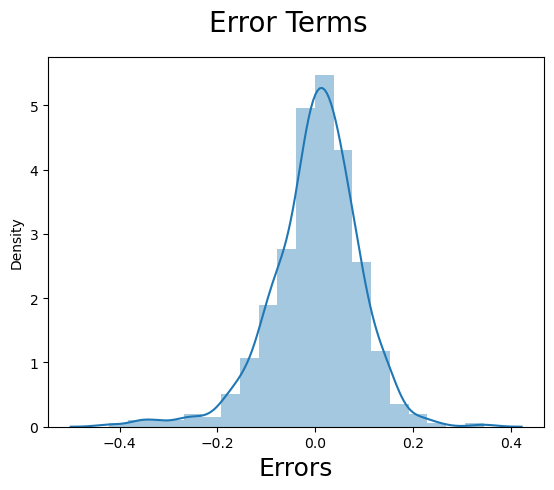

In [481]:
res = y_train-y_train_pred
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Insights
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

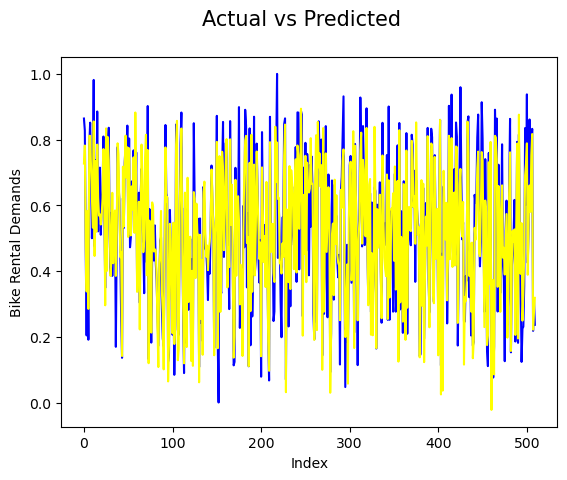

In [487]:
# Actual vs Predicted

k = [i for i in range(0,len(X_train),1)]
plt.plot(k,y_train, color="blue")
plt.plot(k,y_train_pred, color="yellow")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Bike Rental Demands')
plt.show()

**Inference:** Actual and Predicted result following almost the same pattern 

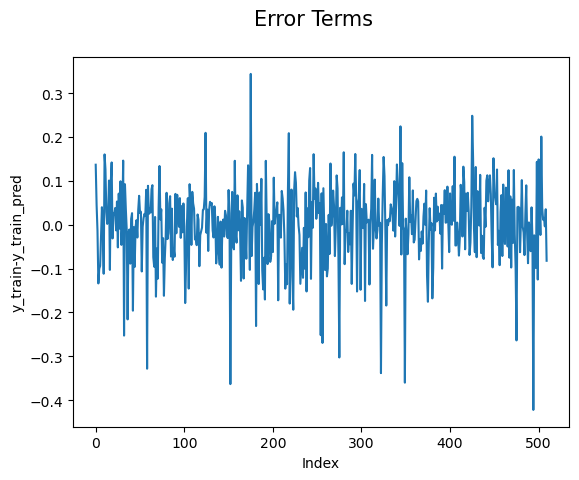

In [488]:
# Test of Error Terms independent of each other 

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

**Inference:** Error Terms are independent of each other 

#### Linearity Check

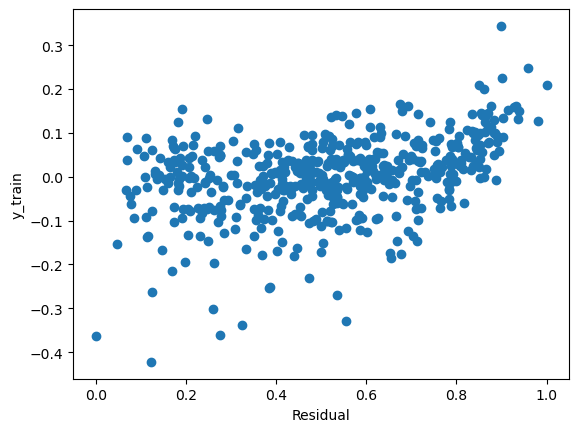

In [489]:
# Linearity Check

residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Multi Colinearity

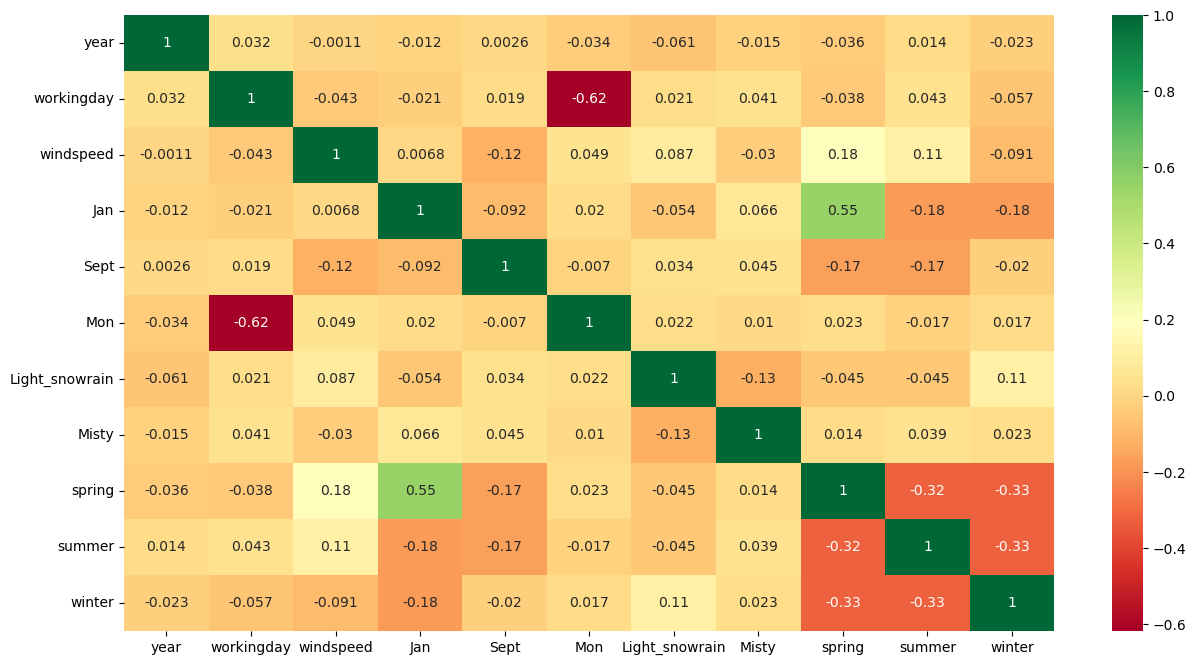

In [490]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

**Inference:** VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Homoscedasticity

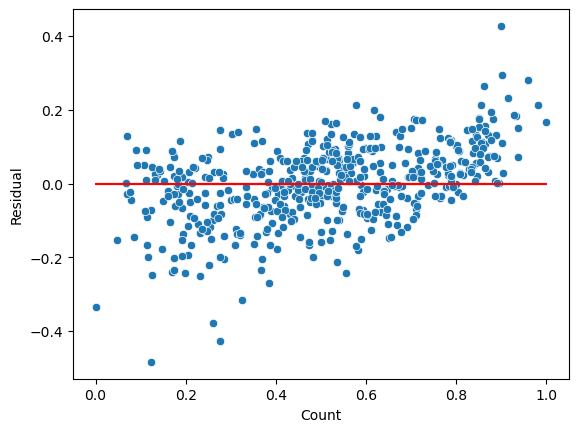

In [500]:
# Variance of residual term

y_train_pred = lr5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train, y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**Inference:** The variance of the residual, or error term, is constant. No visible pattern observed from above plot for residuals.

**Autocorrelation Check - Independence of residuals**

**Inference:** The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. In our case, Durbin-Watson value of final model lr5 is 2.008, which signifies there is no autocorrelation.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

####  Applying the scaling on the test sets

In [512]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# We fit the scalar on the training data set and not on the test data set. And we only transform on the test data set. We 
# never ever fit on the test data set. Because in the real world we are not supposed to know the mean and max of test data 
# set. We transform the data on the test data set based upon the mean values of the training data set.

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [513]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [514]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [515]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            219 non-null    int64  
 1   holiday         219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   atemp           219 non-null    float64
 5   humidity        219 non-null    float64
 6   windspeed       219 non-null    float64
 7   Aug             219 non-null    int32  
 8   Dec             219 non-null    int32  
 9   Feb             219 non-null    int32  
 10  Jan             219 non-null    int32  
 11  July            219 non-null    int32  
 12  June            219 non-null    int32  
 13  Mar             219 non-null    int32  
 14  May             219 non-null    int32  
 15  Nov             219 non-null    int32  
 16  Oct             219 non-null    int32  
 17  Sept            219 non-null    int32  

In [516]:
# Use our model to make predictions.

# Selecting the variables that were part of final model.
X_test = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   year            219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   windspeed       219 non-null    float64
 4   Jan             219 non-null    int32  
 5   Sept            219 non-null    int32  
 6   Mon             219 non-null    int32  
 7   Light_snowrain  219 non-null    int32  
 8   Misty           219 non-null    int32  
 9   spring          219 non-null    int32  
 10  summer          219 non-null    int32  
 11  winter          219 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 15.4 KB


In [517]:
# Making predictions using the fifth model

y_pred = lr5.predict(X_test_lm5)

### Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

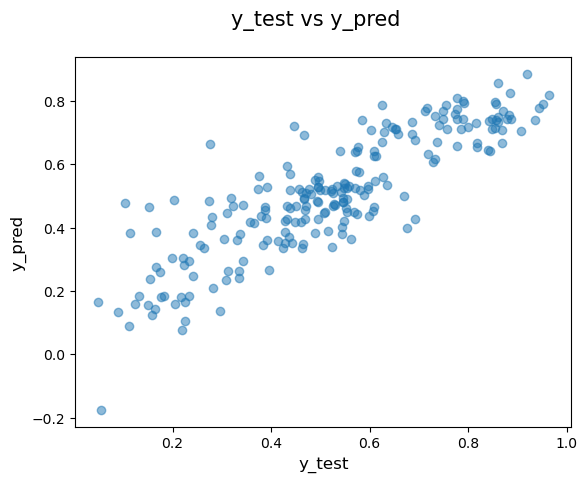

In [528]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 15)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

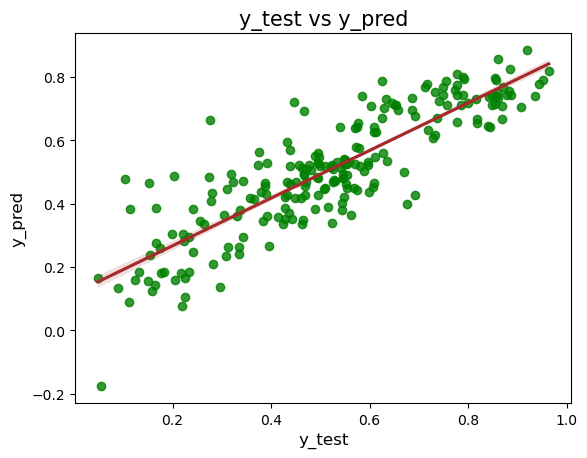

In [529]:
# Visualizing the line of best fit on the test data by plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()

In [524]:
round(lr5.params,6)

const             0.533414
year              0.247992
workingday        0.056660
windspeed        -0.188736
Jan              -0.103085
Sept              0.071353
Mon               0.065027
Light_snowrain   -0.303393
Misty            -0.088820
spring           -0.258069
summer           -0.040579
winter           -0.072862
dtype: float64

We can see that the equation of our best fitted line is:

**cnt** = 0.533414 + (**year**  × 0.247992) + (**workingday** × 0.056660) − (**windspeed** × 0.188736) - (**Jan** × 0.103085) + (**Sept** × 0.071353) + (**Mon** × 0.065027) - (**Light_snowrain** × 0.303393) − (**Misty** × 0.088820) − (**spring** × 0.258069) - (**summer** x 0.040579) - (**winter** x 0.072862)

# R^2 Value for TEST

In [519]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7409269375982521

## Adjusted R^2 Value for TEST

In [520]:
# We already have the value of R^2 (calculated in above step)

r2=0.8058786233591085

In [521]:
# Get the shape of X_test
X_test.shape

(219, 11)

In [522]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.795562994648723

### Final Result Comparison between Train and Test Dataset

* **Train R^2:**                                                     0.779 (from Model 5)
* **Train Adjusted R^2:**                                            0.775 (from Model 5)
* **Test R^2:**                                                      0.806
* **Test Adjusted R^2:**                                             0.796

**Inference:** Based upon the R^2 and Adjusted R^2 values of training and test sets, we can infer that model that can fairly 'Generalize' other datasets.

# FINAL REPORT - Interpretation of results

As per our final model, the following variables can significantly predict the demand for shared bikes:

* year              
* workingday       
* windspeed        
* Jan              
* Sept              
* Mon               
* Light_snowrain   
* Misty            
* spring           
* summer           
* winter           

Out of all the significant variables, the top 5 predictor variables that influence the bike booking and which the company should focus on after the end of COVID-19 situation are listed below.

* **Year -** A coefficient of 0.247992 indicates that a unit increase in 'year' variable, increases the bike hire numbers by 0.247992 units. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
<br>

* **Light_snowrain -** A coefficient of -0.303393 indicates that w.r.t weathersit_1 (clear weather), a unit increase in Light_snowrain variable decreases the bike hire numbers by 0.303393 units.  There would be less bookings during Light Snow or Rain. So the company could probably use this time to service the bikes without having business impact.
<br>

* **Spring -** A coefficient of -0.258069 indicates that, w.r.t season_1 (fall), a unit increase in spring variable, decreases the bike hire numbers by 0.258069 units. So the company should not focus on expanding business during Spring.
<br>

* **Windspeed -** A coefficient of -0.188736 indicates that, a unit increase in windspeed variable decreases the bike hire numbers by 0.188736 units. So the company should not expect on high bookings during windy days as the demand will be low during such days. People generally avoid bike riding during windy days as it is cold.
<br>

* **January -** A coefficient of -0.103085 indicates that w.r.t month_1 (April), a unit increase in January month variable decreases the bike hire numbers by 0.103085 units. So the company should not focus on expanding business during January as the demand will be probably less due to winter season when people would not prefer to ride bikes.
<br>

So, it is recommended to consider these variables with utmost importance while planning their sales to achive maximum rentak booking.